## Keras TF 2.0 - Code Along Classification Project

The Data
Breast cancer wisconsin (diagnostic) dataset
Data Set Characteristics:

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                       Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('cancer_classification.csv')

In [4]:
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
data.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

### Exploratory data analysis - EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

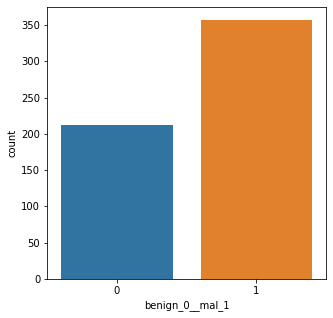

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data['benign_0__mal_1'])

#or
#sns.countplot(x='benign_0__mal_1',data=data)

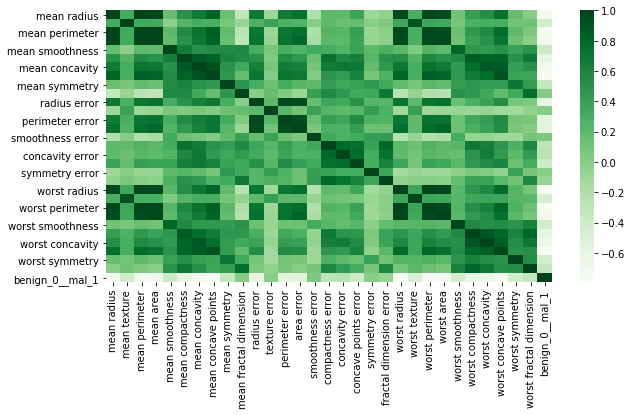

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap="Greens")

In [20]:
data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

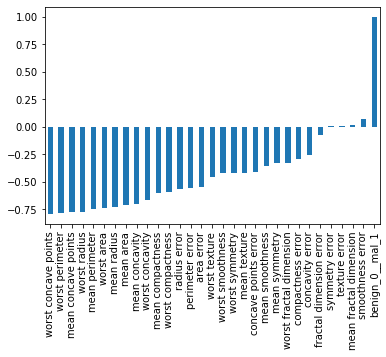

In [22]:
data.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

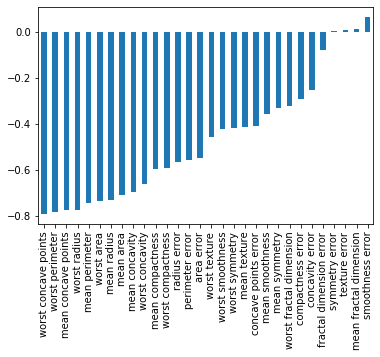

In [24]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### Train Test Split

In [27]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Scaling Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model
##### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [34]:
X_train.shape

(426, 30)

In [35]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy')

### Training the Model

### Example One: Choosing too many epochs and overfitting!

In [36]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6657 - val_loss: 0.6445
Epoch 2/600
426/426 [==============================] - 0s 147us/sample - loss: 0.6134 - val_loss: 0.5990
Epoch 3/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5705 - val_loss: 0.5573
Epoch 4/600
426/426 [==============================] - 0s 159us/sample - loss: 0.5283 - val_loss: 0.5128
Epoch 5/600
426/426 [==============================] - 0s 155us/sample - loss: 0.4881 - val_loss: 0.4725
Epoch 6/600
426/426 [==============================] - 0s 158us/sample - loss: 0.4483 - val_loss: 0.4331
Epoch 7/600
426/426 [==============================] - 0s 151us/sample - loss: 0.4151 - val_loss: 0.3966
Epoch 8/600
426/426 [==============================] - 0s 148us/sample - loss: 0.3829 - val_loss: 0.3651
Epoch 9/600
426/426 [==============================] - 0s 131us/sample - loss: 0.3529 - val_loss: 0.3326
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0577 - val_loss: 0.1087
Epoch 79/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0575 - val_loss: 0.1069
Epoch 80/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0589 - val_loss: 0.1184
Epoch 81/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0607 - val_loss: 0.1095
Epoch 82/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0567 - val_loss: 0.1129
Epoch 83/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0581 - val_loss: 0.1106
Epoch 84/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0562 - val_loss: 0.1177
Epoch 85/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0562 - val_loss: 0.1091
Epoch 86/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0565 - val_loss: 0.1178
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0443 - val_loss: 0.1191
Epoch 156/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0436 - val_loss: 0.1320
Epoch 157/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0434 - val_loss: 0.1174
Epoch 158/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0458 - val_loss: 0.1275
Epoch 159/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0451 - val_loss: 0.1219
Epoch 160/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0459 - val_loss: 0.1294
Epoch 161/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0554 - val_loss: 0.1246
Epoch 162/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0490 - val_loss: 0.1215
Epoch 163/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0496 - val_loss: 0.1211
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 138us/sample - loss: 0.0373 - val_loss: 0.1310
Epoch 232/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0367 - val_loss: 0.1281
Epoch 233/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0356 - val_loss: 0.1293
Epoch 234/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0422 - val_loss: 0.1236
Epoch 235/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0357 - val_loss: 0.1381
Epoch 236/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0354 - val_loss: 0.1337
Epoch 237/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0368 - val_loss: 0.1291
Epoch 238/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0342 - val_loss: 0.1378
Epoch 239/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0338 - val_loss: 0.1255
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 134us/sample - loss: 0.0286 - val_loss: 0.1385
Epoch 308/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0297 - val_loss: 0.1451
Epoch 309/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0286 - val_loss: 0.1370
Epoch 310/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0278 - val_loss: 0.1437
Epoch 311/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0279 - val_loss: 0.1480
Epoch 312/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0280 - val_loss: 0.1491
Epoch 313/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0269 - val_loss: 0.1390
Epoch 314/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0310 - val_loss: 0.1573
Epoch 315/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0275 - val_loss: 0.1408
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 134us/sample - loss: 0.0243 - val_loss: 0.1735
Epoch 384/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0232 - val_loss: 0.1582
Epoch 385/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0235 - val_loss: 0.1569
Epoch 386/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0214 - val_loss: 0.1672
Epoch 387/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0236 - val_loss: 0.1565
Epoch 388/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0472 - val_loss: 0.1860
Epoch 389/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0370 - val_loss: 0.1410
Epoch 390/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0279 - val_loss: 0.1738
Epoch 391/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0226 - val_loss: 0.1584
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 131us/sample - loss: 0.0208 - val_loss: 0.1628
Epoch 460/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0197 - val_loss: 0.2012
Epoch 461/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0193 - val_loss: 0.1793
Epoch 462/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0186 - val_loss: 0.1787
Epoch 463/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0283 - val_loss: 0.2145
Epoch 464/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0183 - val_loss: 0.1782
Epoch 465/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0185 - val_loss: 0.2029
Epoch 466/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0199 - val_loss: 0.1882
Epoch 467/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0163 - val_loss: 0.1836
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 144us/sample - loss: 0.0126 - val_loss: 0.2060
Epoch 536/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0126 - val_loss: 0.2206
Epoch 537/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0132 - val_loss: 0.2103
Epoch 538/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0147 - val_loss: 0.2316
Epoch 539/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0127 - val_loss: 0.2026
Epoch 540/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0124 - val_loss: 0.2172
Epoch 541/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0146 - val_loss: 0.2088
Epoch 542/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0142 - val_loss: 0.2428
Epoch 543/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0137 - val_loss: 0.2119
Epoch 544/600
426/426 [============================

In [37]:
model_loss = pd.DataFrame(model.history.history)

In [38]:
model_loss.head()

loss  val_loss
0  0.665676  0.644489
1  0.613433  0.598963
2  0.570500  0.557343
3  0.528335  0.512832
4  0.488081  0.472452

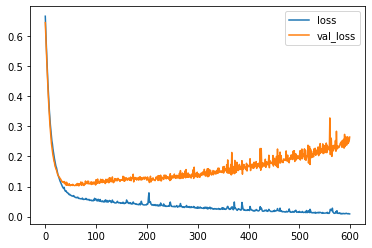

In [39]:
model_loss.plot()

### Example Two: Early Stopping
We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [40]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

Arguments:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored quantity
        to qualify as an improvement, i.e. an absolute
        change of less than min_delta, will count as no
        improvement.
    patience: Number of epochs with no improvement
        after which training will be stopped.
    verbose: verbosity mode.
    mode: One of `{"auto", "min", "max"}`. In `min` mode,
        training will stop when the quantity
        monitored has stopped decreasing; in `max`
        mode it will stop when the quantity
        monitored has stopped increasing; in `auto`
        mode, the direction is automatically inferred
        from the name of the monitored quantity.

In [42]:
early_stop = EarlyStopping(
                           monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=25
                          )

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6862 - val_loss: 0.6709
Epoch 2/600
426/426 [==============================] - 0s 141us/sample - loss: 0.6553 - val_loss: 0.6417
Epoch 3/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6229 - val_loss: 0.6089
Epoch 4/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5900 - val_loss: 0.5726
Epoch 5/600
426/426 [==============================] - 0s 147us/sample - loss: 0.5519 - val_loss: 0.5304
Epoch 6/600
426/426 [==============================] - 0s 146us/sample - loss: 0.5062 - val_loss: 0.4808
Epoch 7/600
426/426 [==============================] - 0s 146us/sample - loss: 0.4570 - val_loss: 0.4305
Epoch 8/600
426/426 [==============================] - 0s 147us/sample - loss: 0.4096 - val_loss: 0.3809
Epoch 9/600
426/426 [==============================] - 0s 154us/sample - loss: 0.3650 - val_loss: 0.3399
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0628 - val_loss: 0.0978
Epoch 79/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0700 - val_loss: 0.1079
Epoch 80/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0593 - val_loss: 0.0983
Epoch 81/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0535 - val_loss: 0.1028
Epoch 82/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0535 - val_loss: 0.1022
Epoch 83/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0521 - val_loss: 0.0992
Epoch 84/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0540 - val_loss: 0.1053
Epoch 85/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0518 - val_loss: 0.0983
Epoch 86/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0520 - val_loss: 0.0998
Epoch 87/600
426/426 [========================

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  val_loss
0  0.686203  0.670906
1  0.655280  0.641726
2  0.622889  0.608924
3  0.589962  0.572590
4  0.551877  0.530436

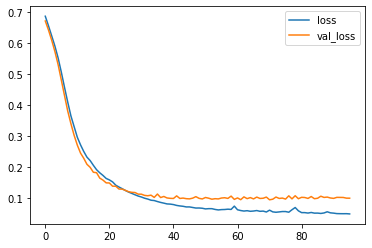

In [46]:
model_loss.plot()

### Example Three: Adding in DropOut Layers

In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7524 - val_loss: 0.6707
Epoch 2/600
426/426 [==============================] - 0s 163us/sample - loss: 0.6976 - val_loss: 0.6497
Epoch 3/600
426/426 [==============================] - 0s 156us/sample - loss: 0.6613 - val_loss: 0.6319
Epoch 4/600
426/426 [==============================] - 0s 153us/sample - loss: 0.6629 - val_loss: 0.6175
Epoch 5/600
426/426 [==============================] - 0s 152us/sample - loss: 0.6305 - val_loss: 0.6023
Epoch 6/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6199 - val_loss: 0.5831
Epoch 7/600
426/426 [==============================] - 0s 158us/sample - loss: 0.5893 - val_loss: 0.5618
Epoch 8/600
426/426 [==============================] - 0s 158us/sample - loss: 0.5831 - val_loss: 0.5366
Epoch 9/600
426/426 [==============================] - 0s 159us/sample - loss: 0.5497 - val_loss: 0.5100
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1079 - val_loss: 0.0935
Epoch 79/600
426/426 [==============================] - 0s 140us/sample - loss: 0.1114 - val_loss: 0.0944
Epoch 80/600
426/426 [==============================] - 0s 142us/sample - loss: 0.1210 - val_loss: 0.0993
Epoch 81/600
426/426 [==============================] - 0s 144us/sample - loss: 0.1236 - val_loss: 0.0911
Epoch 82/600
426/426 [==============================] - 0s 138us/sample - loss: 0.1243 - val_loss: 0.1052
Epoch 83/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1226 - val_loss: 0.0890
Epoch 84/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1142 - val_loss: 0.0955
Epoch 85/600
426/426 [==============================] - 0s 147us/sample - loss: 0.1202 - val_loss: 0.0908
Epoch 86/600
426/426 [==============================] - 0s 139us/sample - loss: 0.1082 - val_loss: 0.0849
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0831 - val_loss: 0.0916
Epoch 156/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0701 - val_loss: 0.0873
Epoch 157/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0840 - val_loss: 0.0908
Epoch 158/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0954 - val_loss: 0.0934
Epoch 159/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0899 - val_loss: 0.0867
Epoch 160/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0907 - val_loss: 0.0789
Epoch 161/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0875 - val_loss: 0.0790
Epoch 162/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0633 - val_loss: 0.0848
Epoch 163/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0675 - val_loss: 0.1014
Epoch 164/600
426/426 [==============

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  val_loss
0  0.752408  0.670651
1  0.697599  0.649733
2  0.661309  0.631860
3  0.662883  0.617472
4  0.630483  0.602309

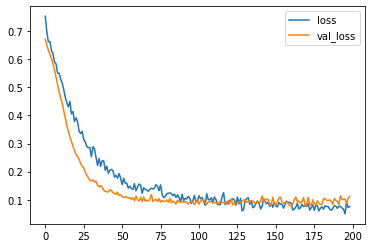

In [51]:
model_loss.plot()

### Model Evaluation

In [68]:
predictions = model.predict_classes(X_train)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [70]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.99      1.00      0.99       269

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [71]:
print(confusion_matrix(y_train, predictions))

[[153   4]
 [  1 268]]


In [72]:
print(accuracy_score(y_train, predictions))

0.9882629107981221


In [73]:
predictions = model.predict_classes(X_test)

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [76]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]


In [78]:
print(accuracy_score(y_test, predictions) * 100)

96.5034965034965
